# **Email Marketing Campaign Optimization**
---

## **Introduction**
Optimizing marketing campaigns is a critical application of data science that drives business growth. Among the many tools available, emails stand out as particularly effective because they are:
- **Cost-effective**: No substantial investment is required to send emails.
- **Scalable**: Easily adaptable for any number of recipients.
- **Customizable**: Content, subject lines, and timing can all be personalized to improve engagement.

---

## **Key Questions**
1. **What percentage of users opened the email and what percentage clicked on the link within the email?**
   
2. **The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?**

3. **By how much can the model improve the Click-Through Rate (CTR)?**

4. **What patterns can we identify in different user segments?**

#### Unzipping files, loading the datasets!

In [48]:
import zipfile
with zipfile.ZipFile('/content/email (1)-20250414T183526Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

#### Importing necessary libraries

In [49]:
import pandas as pd

In [50]:
df1 = pd.read_csv('/content/email (1)/email_table.csv')
df2 = pd.read_csv('/content/email (1)/email_opened_table.csv')
df3 = pd.read_csv('/content/email (1)/link_clicked_table.csv')

- df1 - contains data regarding email's sent
- df2 - contains data regarding email's that were read.
- df3 - contains data regarding email's that were read and links were clicked.

### **Preprocessing**

- Exploring datasets to comprehend fields.
- Inspecting null values, unique values and correcting data types.

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [52]:
df1.head(2)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2


In [53]:
df1.isna().sum()

,0
email_id,0
email_text,0
email_version,0
hour,0
weekday,0
user_country,0
user_past_purchases,0


In [54]:
for col in df1.columns:
  if col != 'email_id':
    print(f"Unique values for column '{col}':")
    print(df1[col].unique())
    print("-" * 20)

Unique values for column 'email_text':
['short_email' 'long_email']
--------------------
Unique values for column 'email_version':
['personalized' 'generic']
--------------------
Unique values for column 'hour':
[ 2 12 11  6 14  9  8  5 23  7 10  3  4  1 13 15 17 16 20 18 19 22 21 24]
--------------------
Unique values for column 'weekday':
['Sunday' 'Wednesday' 'Monday' 'Saturday' 'Friday' 'Tuesday' 'Thursday']
--------------------
Unique values for column 'user_country':
['US' 'UK' 'FR' 'ES']
--------------------
Unique values for column 'user_past_purchases':
[ 5  2  1  6  3  8  4  9  0 11 10  7 13 12 18 14 20 15 16 17 19 22 21]
--------------------


In [55]:
df2.isna().sum()

,0
email_id,0


In [56]:
df3.isna().sum()

,0
email_id,0


- We know that df2 and df3 are typically subsets of df1. Therefore, we can create two additional columns - **opened_link** and **opened_email**, by checking membership df2 and df3 in df1.

In [57]:
df1['opened_email'] = df1['email_id'].isin(df2['email_id']).astype(int)
df1['opened_link'] = df1['email_id'].isin(df3['email_id']).astype(int)

### **Exploratory Data Analysis using KPIs for Email Campaigns**

**1. CTR (Click-Through Rate)**
- **Definition**: Percentage of users who clicked on the link out of all users who received the email.
- **Formula**: (Number of users who clicked on the link / Total number of users who received the email) × 100

**2. Email Open Rate**
- **Definition**: Percentage of users who opened the email out of all users who received it.
- **Formula**: (Number of users who opened the email / Total number of users who received the email) × 100

**3. CTOR (Click-to-Open Rate)**
- **Definition**: Percentage of users who clicked on the link after opening the email.
- **Formula**: (Number of users who clicked on the link / Number of users who opened the email) × 100


In [58]:
def open_rate(df):
  return (df['opened_email'].sum() / df['email_id'].nunique())*100

def ctr(df):
  return (df['opened_link'].sum() / df['email_id'].nunique())*100

def CTOR(df):
  if df['opened_email'].count() == 0:
    return 0
  return (df['opened_link'].sum() / df['opened_email'].count())*100

In [59]:
print(f"Open Rate: {open_rate(df1):.2f}%")
print(f"Click-Through Rate (CTR): {ctr(df1):.2f}%")
print(f"Click-To-Open Rate (CTOR): {CTOR(df1):.2f}%")

Open Rate: 10.35%
Click-Through Rate (CTR): 2.12%
Click-To-Open Rate (CTOR): 2.12%


#### Industry Benchmarks for Email Campaign KPIs (2025)
- Open Rate: The Average Open Rate for software/IT - Email Marketing is anywhere from 28% to 38%.

- Click-Through Rate (CTR): The average CTR across software IT oscillate from 1.6% is around 2.62%.

- Click-to-Open Rate (CTOR): The average CTOR for software/IT
might range from 9% to 15%.

#### Sources:
1. https://clickdimensions.com/blogs/email-marketing-benchmarking-report-2025/
2. https://www.moengage.com/blog/average-email-open-rate/
3. https://www.webfx.com/blog/marketing/email-marketing-benchmarks/
4. https://www.campaignmonitor.com/resources/knowledge-base/what-are-good-email-metrics/

#### **Report I - Q1**

- Emails are being opened at a significantly **lower rate** than expected for the software/IT sector.

- The **CTR** is within the industry range. However, given the low open rate, the absolute number of clicks is limited.

- A **very low CTOR** indicates that even when users open the email, call-to-action is not enticing enough to prompt clicks.

*To get better insights, we can explore different fields from the data given against these KPI's.*

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
def get_group(df,field):
  df = df.groupby(field).agg(
    total_emails=('email_id', 'count'),
    total_opened=('opened_email', 'sum'),
    total_clicked=('opened_link', 'sum')
  ).reset_index()
  return df

In [62]:
def plot(X,Y,data,Title,yLabel,xLabel):
  plt.figure(figsize=(10, 6))
  sns.barplot(data=data, x=X, y=Y, hue='Metric', palette='Set2')
  plt.title(Title)
  plt.ylabel(yLabel)
  plt.xlabel(xLabel)
  plt.ylim(0, max(melted['Percentage']) + 5)
  plt.legend(title='Metric')
  plt.tight_layout()
  plt.show()

In [63]:
def get_metrics(df):
  df['open_rate'] = (df['total_opened'] / df['total_emails']) * 100
  df['CTR'] = (df['total_clicked'] / df['total_emails']) * 100
  df['CTOR'] = (df['total_clicked'] / df['total_opened'].replace(0, 1)) * 100
  return df

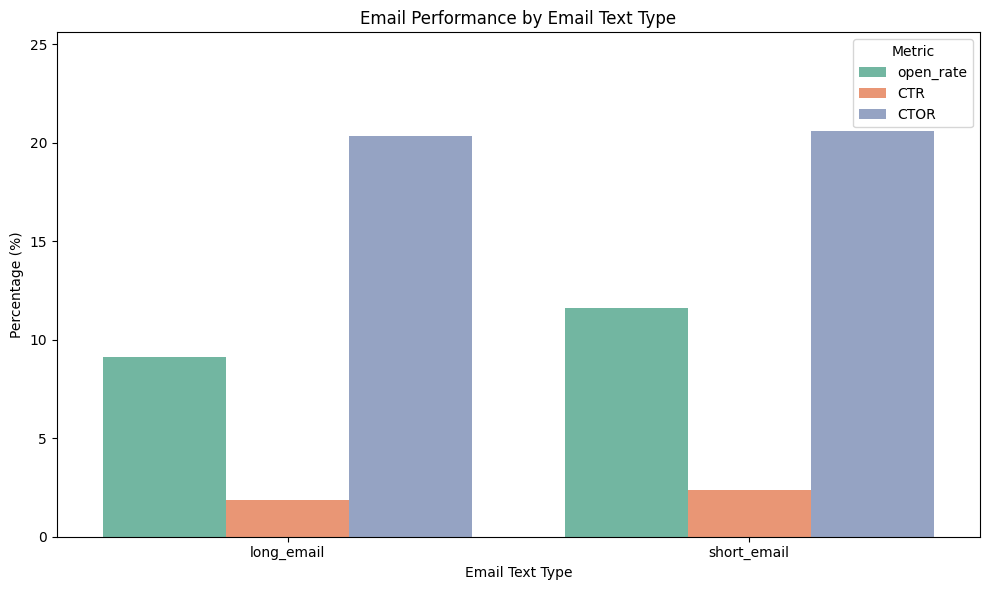

In [64]:
email_grp = get_group(df1,'email_text')

email_grp = get_metrics(email_grp)

melted = email_grp.melt(id_vars='email_text', value_vars=['open_rate', 'CTR', 'CTOR'],
                      var_name='Metric', value_name='Percentage')

plot('email_text','Percentage',melted,'Email Performance by Email Text Type','Percentage (%)','Email Text Type')

- The **higher Open Rate** suggests that subject lines or previews tied to short-text emails may have been more appealing.

- The **higher CTR** shows that users clicked through more often from short emails — they likely got the message quickly and acted.

- Since **CTOR** is similar, the content inside both types is similarly effective at driving action.

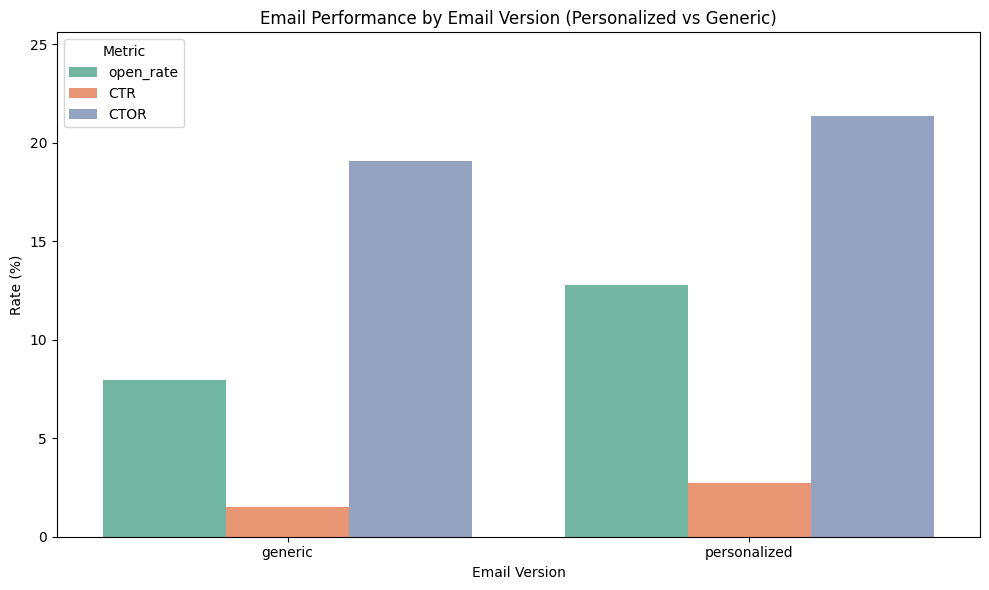

In [65]:
version_metrics = get_group(df1,'email_version')

version_metrics = get_metrics(version_metrics)

plot_data = version_metrics.melt(id_vars='email_version', value_vars=['open_rate', 'CTR', 'CTOR'],
                                 var_name='Metric', value_name='Rate')

plot('email_version', 'Rate', plot_data, 'Email Performance by Email Version (Personalized vs Generic)', 'Rate (%)', 'Email Version')

- The **personalized campaign** is more successful than the generic one. It reached more users, engaged more of them, and nudged them toward clicks more effectively. This supports investing more in personalized email marketing strategies.

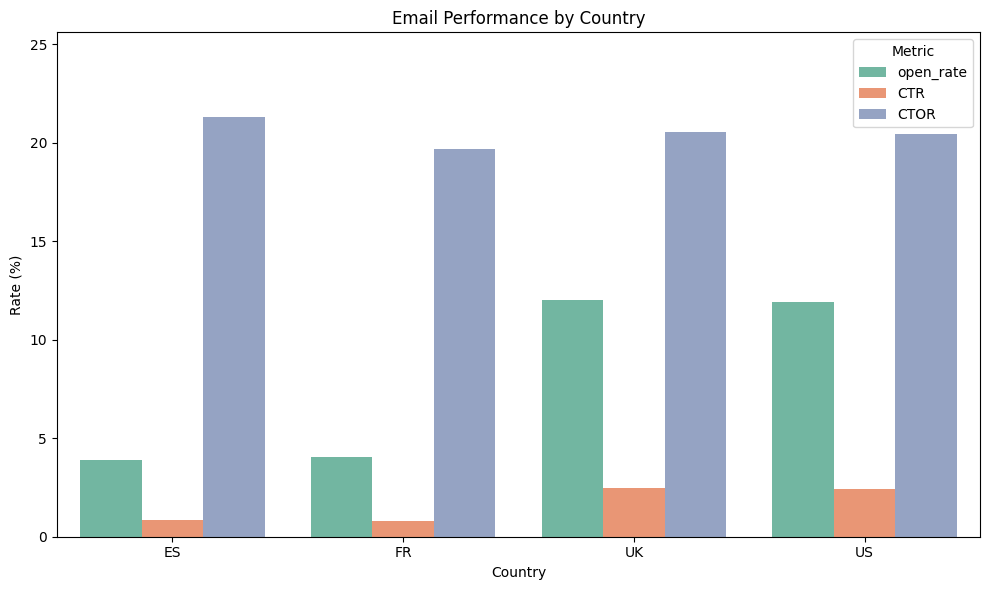

In [66]:
country_metrics = get_group(df1,'user_country')

country_metrics = get_metrics(country_metrics)

metrics_to_plot = ['open_rate', 'CTR', 'CTOR']

country_melted = country_metrics.melt(
    id_vars='user_country',
    value_vars=metrics_to_plot,
    var_name='Metric',
    value_name='Rate (%)'
)

plot('user_country', 'Rate (%)', country_melted, 'Email Performance by Country', 'Rate (%)', 'Country')

- To match the **strong engagement** seen in the **US** and **UK**, **Spain** and **France** need targeted improvements in email localization, timing, and personalization, as content quality already shows high potential through strong CTOR.

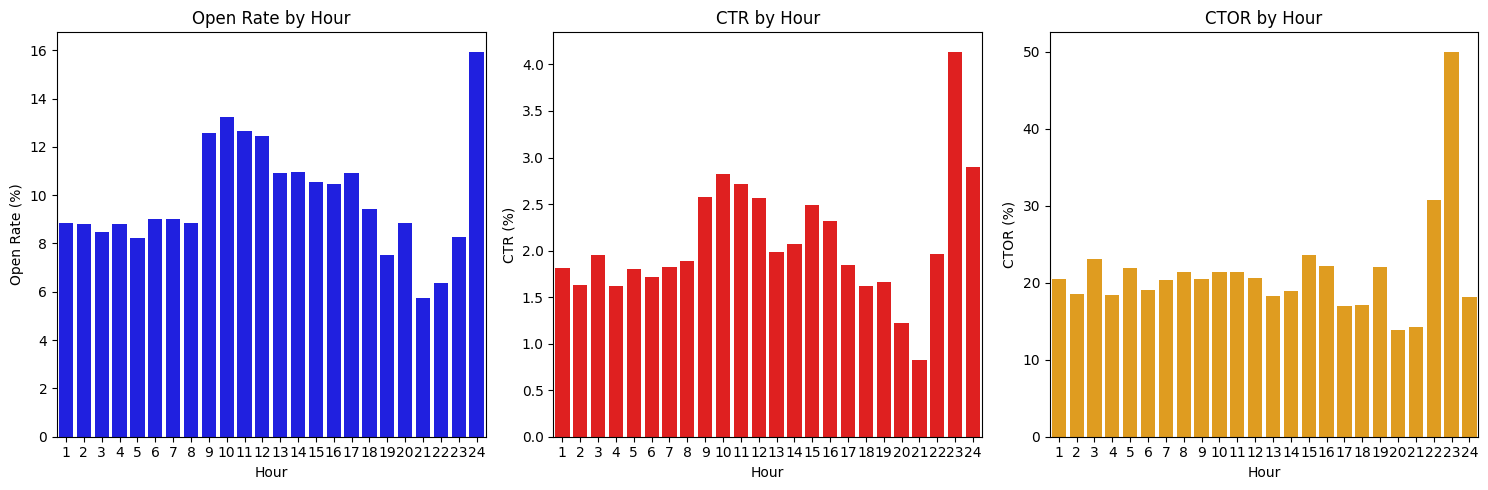

In [67]:
hourly_metrics = get_group(df1,'hour')

hourly_metrics = get_metrics(hourly_metrics)

plt.figure(figsize=(15, 5))

#Plotting Open Rate by Hour
plt.subplot(1, 3, 1)
sns.barplot(data=hourly_metrics, x='hour', y='open_rate', color='blue')
plt.title('Open Rate by Hour')
plt.xlabel('Hour')
plt.ylabel('Open Rate (%)')

#Plotting CTR by Hour
plt.subplot(1, 3, 2)
sns.barplot(data=hourly_metrics, x='hour', y='CTR', color='red')
plt.title('CTR by Hour')
plt.xlabel('Hour')
plt.ylabel('CTR (%)')

#Plotting CTOR by Hour
plt.subplot(1, 3, 3)
sns.barplot(data=hourly_metrics, x='hour', y='CTOR', color='orange')
plt.title('CTOR by Hour')
plt.xlabel('Hour')
plt.ylabel('CTOR (%)')

plt.tight_layout()
plt.show()

- The **Open Rate** steadily increases from early hours, peaking between 9 AM and 11 AM at about 14%.
- **CTR** aligns closely with **Open Rates** until 11 AM but spikes noticeably around 11 PM at approximately 4%.
- **CTOR** remains relatively stable (20–30%) from early morning until around 8 PM. It surges significantly after 9 PM, peaking at nearly 50% at 11 PM.

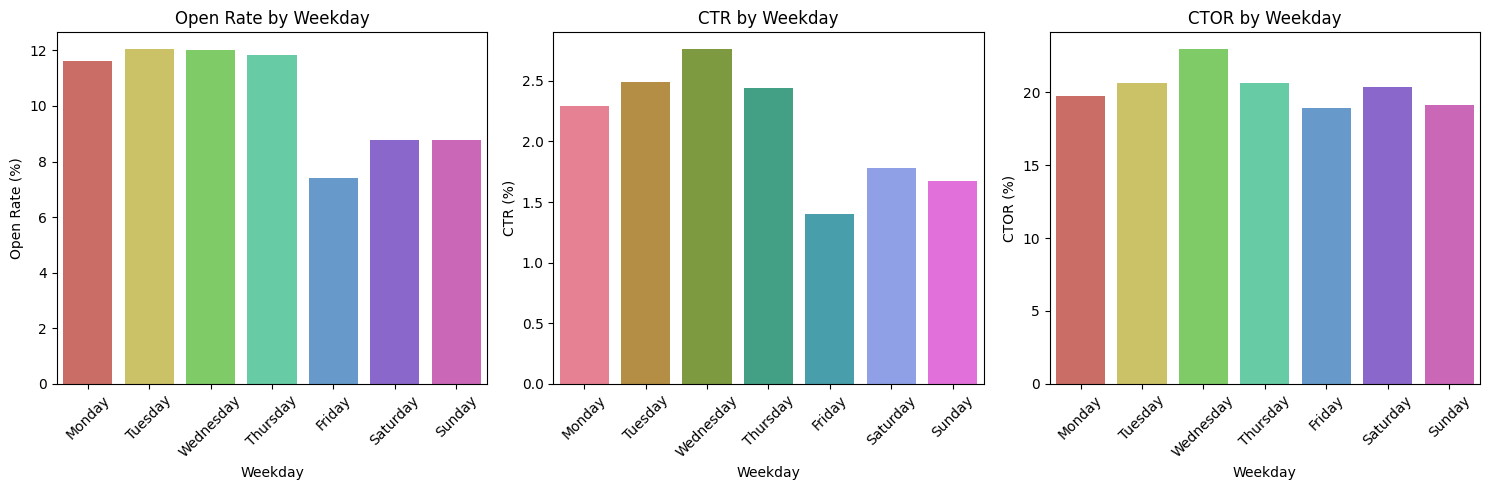

In [68]:
import warnings
warnings.filterwarnings('ignore')

weekday_metrics = get_group(df1,'weekday')

weekday_metrics = get_metrics(weekday_metrics)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_metrics['weekday'] = pd.Categorical(weekday_metrics['weekday'], categories=weekday_order, ordered=True)
weekday_metrics.sort_values('weekday', inplace=True)

plt.figure(figsize=(15, 5))

#Plotting for Open Rate
plt.subplot(1, 3, 1)
sns.barplot(data=weekday_metrics, x='weekday', y='open_rate', palette='hls', legend=False)
plt.title('Open Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Open Rate (%)')
plt.xticks(rotation=45)

#Plotting for CTR
plt.subplot(1, 3, 2)
sns.barplot(data=weekday_metrics, x='weekday', y='CTR', palette='husl', legend=False)
plt.title('CTR by Weekday')
plt.xlabel('Weekday')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

#Plotting for CTOR
plt.subplot(1, 3, 3)
sns.barplot(data=weekday_metrics, x='weekday', y='CTOR', palette='hls', legend=False)
plt.title('CTOR by Weekday')
plt.xlabel('Weekday')
plt.ylabel('CTOR (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Open Rates**

- **Open Rates** **peak** on **Tuesday** and **Wednesday** at around **12%**.
- There’s a noticeable **drop** on **Friday**, down to approximately **8%**.
- Over the **weekend** (**Saturday** and **Sunday**), Open Rates **stabilize** at roughly **9%**, slightly higher than **Friday**.

**CTR**

- The **highest CTR** is observed on **Wednesday**, around **2.6%**, followed by **Tuesday** and **Thursday** at **2.4%**.
- **CTR** dips to its **lowest** on **Friday**, at approximately **1.8%**.
- Slight recovery is seen on **Saturday** (**2.0%**) and **Sunday** (**1.9%**).

**CTOR**

- **CTOR** peaks on **Wednesday** at **23%**, indicating **strong engagement** for emails opened.
- **Consistently high** CTOR values (**20-22%**) are seen throughout the week, with **minor fluctuations**.

Text(0.5, 36.58159722222221, 'Email Type')

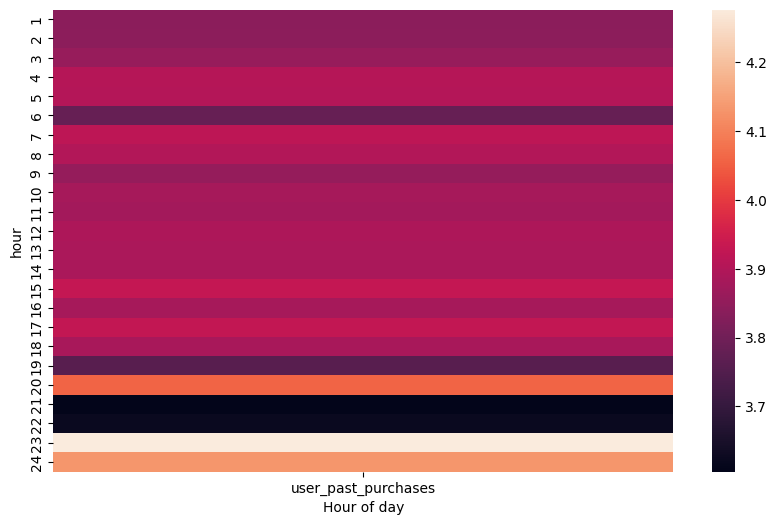

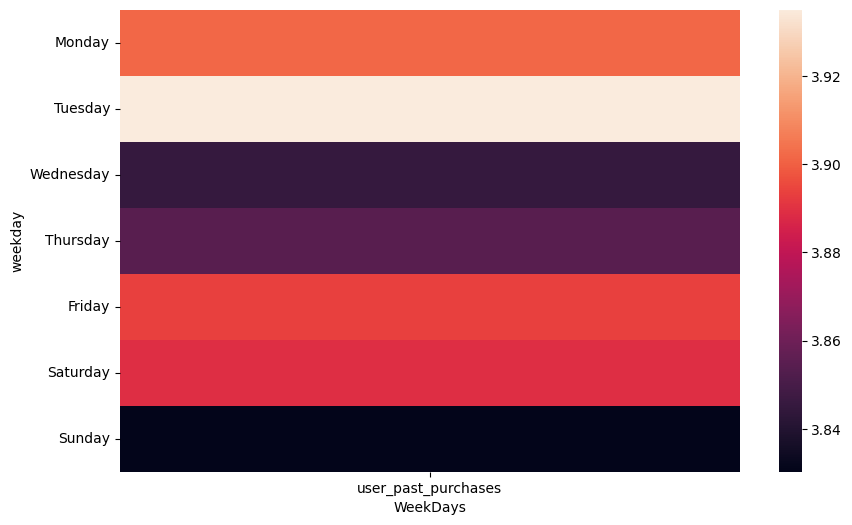

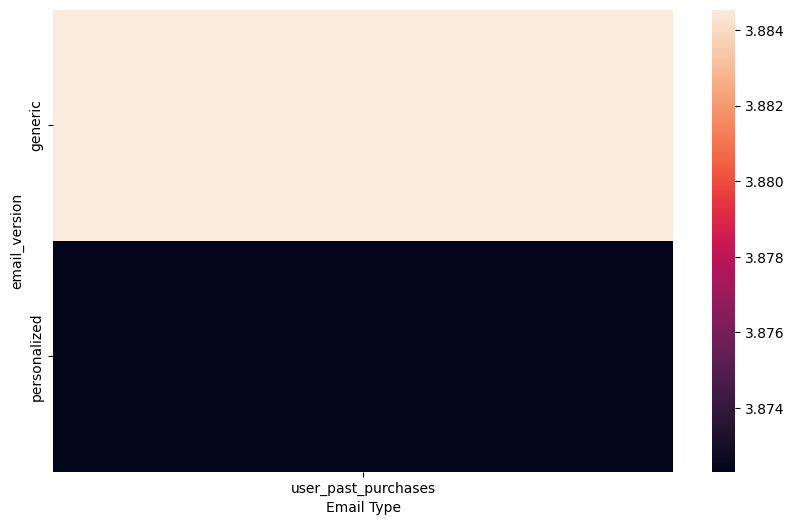

In [69]:
hour_pivot = df1.pivot_table(values='user_past_purchases', index='hour', aggfunc='mean')
weekday_pivot = df1.pivot_table(values='user_past_purchases', index='weekday', aggfunc='mean')
email_version_pivot = df1.pivot_table(values='user_past_purchases', index='email_version', aggfunc='mean')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_pivot = weekday_pivot.reindex(weekday_order)

plt.figure(figsize=(10, 6))
sns.heatmap(hour_pivot)
plt.xlabel("Hour of day")

plt.figure(figsize=(10, 6))
sns.heatmap(weekday_pivot)
plt.xlabel("WeekDays")

plt.figure(figsize=(10, 6))
sns.heatmap(email_version_pivot)
plt.xlabel("Email Type")

**User Past Purchases by Hour**
- The **late evening hours** (approximately **20:00 to 24:00**) display the **highest intensity** of user purchases.
- The hours from **1:00 to 20:00** show **relatively stable** purchase behavior, with no drastic peaks or valleys.
- The **darkest shades**, representing **lower purchase activity**, are observed in the **very early morning hours** (e.g., **1:00–6:00**).

**User Past Purchases by Email Type**
- The **generic email version** is associated with a **slightly higher average** of user past purchases compared to the **personalized email version**.

**User Past Purchases by Weekdays**
- The **lowest purchase activity** is observed on **Sunday**, and the **highest average user purchases** occur on **Monday**.
- From **Tuesday to Saturday**, the purchase activity is **relatively stable**, with slight variations.

#### **Report II - Q4**

### **Patterns Identified in Different User Segments**

#### **Email Timing**
- **Open Rates** and **CTR** **peak** between **9 AM and 11 AM**, showing that **morning emails** are **effective**.
- A **secondary CTR spike** occurs around **11 PM** (~4%), suggesting **late-night emails** may **drive engagement** for specific user groups.
- **CTOR surges** after **9 PM**, **peaking at 50%** at **11 PM**, indicating **strong evening engagement** for opened emails.

#### **Email Content**
- **Short-text emails** lead to **higher Open Rates** and **CTR**, indicating users prefer **concise messaging** that quickly conveys value.
- **Similar CTOR values** for both email types suggest that the **action-driving content** inside the emails performs **equally well**, regardless of length.

#### **Personalized vs. Generic Campaigns**
- **Personalized emails** are more **successful** than generic ones, engaging more users and leading to **higher clicks**. This supports the **effectiveness of personalization** in campaigns.
- **Generic emails**, however, slightly **outperform personalized ones** in terms of **past purchases**, possibly due to broader appeal.

#### **Geographic Segments**
- **US and UK** show **strong engagement** across KPIs, driven by **effective email strategies**.
- **Spain and France** **underperform** despite high CTOR values, suggesting they need **localized content**, **timing adjustments**, and **better personalization**.

#### **User Purchase Behavior**
- **Late evening hours (20:00–24:00)** show the **highest intensity** of user purchases, suggesting campaigns targeting these hours may **boost revenue**.
- **Early morning hours (1:00–6:00)** display **low purchase activity**, indicating these hours are **less effective** for campaigns.
- **Monday** has the **highest purchase activity**, while **Sunday** performs the **worst**. Purchase behavior remains **relatively stable** from **Tuesday through Saturday**.


### **Predictive Modeling**

We can try to predict **opened_link** (i.e if the link present in email was clicked or not) by **classification Models**.

 **Steps**:

 1. Encode categorical variables and plot heatmap to visualize correlation between features.
 2. Check Class Imbalance, and devise strategy to handle model building.
 3. If Class Imbalance exist, choose the right metrics for model evaluation and optimal strategy to deal with imbalance.

In [70]:
categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']
df = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

In [71]:
dummyDF = df.copy() #for future-use

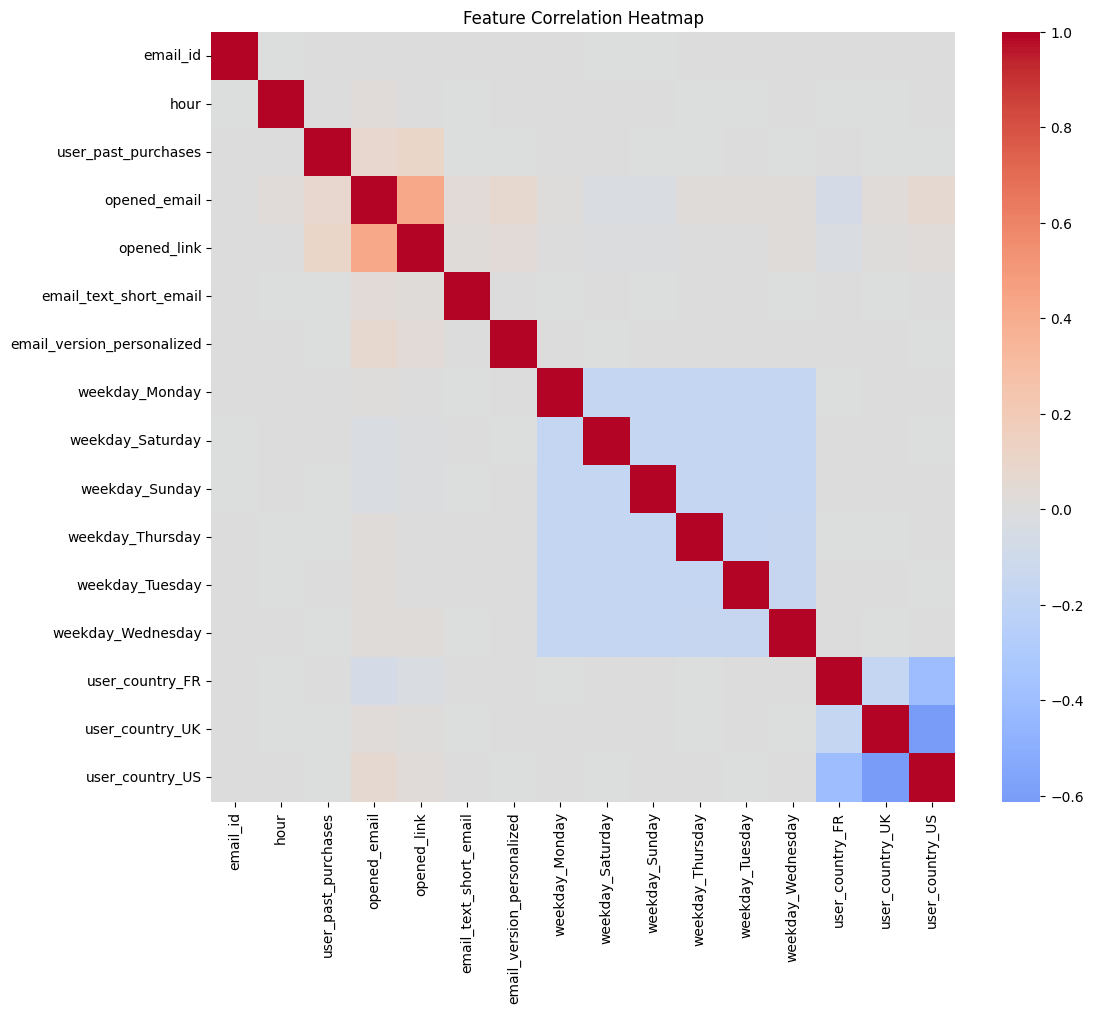

In [72]:
corr = df.corr()

target_corr = corr[['opened_link']].sort_values(by='opened_link', ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

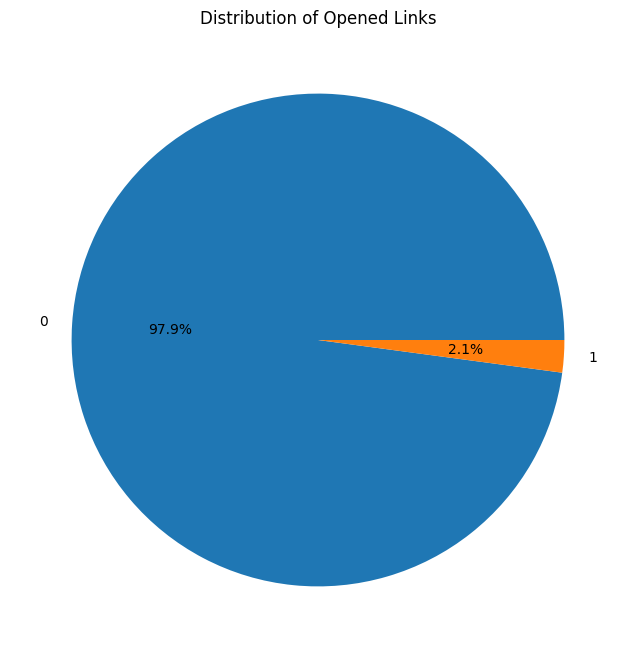

In [73]:
opened_link_counts = df['opened_link'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(opened_link_counts, labels=opened_link_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Opened Links')
plt.show()

- Minority class is only **2.1%**, which is relatively very low in comparison to majority class of linked not being opened (i.e value 0).

**Handling Class Imbalance in Predictive Modeling**

**Class Imbalance**
- Class imbalance refers to scenarios where one class (e.g., `clicked_link=1`) is significantly underrepresented compared to the other (e.g., `clicked_link=0`). This imbalance can cause models to favor the majority class and ignore the minority class, leading to poor predictions for the minority class.

**Downsampling**
- Downsampling reduces the size of the majority class by randomly selecting a subset of its samples. This creates a balanced dataset while minimizing the dominance of the majority class during model training.

**Upweighting**
- Upweighting involves assigning higher importance (weight) to the minority class in the loss function. It penalizes the model more for misclassifying the minority class compared to the majority class.

**SMOTE (Synthetic Minority Oversampling Technique)**
- SMOTE creates synthetic samples for the minority class by interpolating between existing samples. This enhances minority class representation without duplicating data, thereby adding diversity.

**Stratified K-Fold Cross-Validation**
- **Explanation**: Stratified K-Fold splits the dataset into K folds while preserving the class proportions in each fold. This ensures that both classes are represented equally during training and validation across all folds.

**Metrics for Evaluation**
1. **F1-Score**:
   - **Explanation**: Balances precision (avoiding false positives) and recall (avoiding false negatives), making it ideal for imbalanced datasets.
   - **Reason for Action**: Provides a holistic view of how well the model predicts the minority class without biasing toward precision or recall alone.

2. **AUC-ROC**:
   - **Explanation**: Measures the model's ability to distinguish between classes. A high AUC-ROC score indicates strong discriminatory power.
   - **Reason for Action**: Evaluates the model across all classification thresholds, ensuring overall performance for both classes.

3. **PR-AUC**:
   - **Explanation**: Focuses on the precision-recall trade-off for the minority class, highlighting its performance independently of the majority class.
   - **Reason for Action**: Ensures the model performs well specifically for the minority class, which is critical for imbalanced datasets.


In [74]:
#Loading modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, average_precision_score, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [75]:
#Split majority and minority
df_majority = df[df['opened_link'] == 0]
df_minority = df[df['opened_link'] == 1]

#Downsample majority
downsample_factor = 12
df_majority_downsampled = df_majority.sample(
    n=len(df_majority)//downsample_factor, random_state=42
)

#Combine downsampled majority + original minority
df_combined = pd.concat([df_majority_downsampled, df_minority])
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

#Prepare features and target
X = df_combined.drop(columns=['opened_link', 'email_id'])
y = df_combined['opened_link']

#### **Logistic Regression**

Logistic Regression is a simple and interpretable model that predicts probabilities for binary classification tasks.

In [76]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Upweighting
weights = y_resampled.apply(lambda x: downsample_factor if x == 0 else 1)

#Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
roc_aucs = []
pr_aucs = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    w_train = weights.iloc[train_index]

    modelLR = LogisticRegression(max_iter=1000)
    modelLR.fit(X_train, y_train, sample_weight=w_train)
    y_pred = modelLR.predict(X_test)
    y_proba = modelLR.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    f1_scores.append(f1)
    roc_aucs.append(roc)
    pr_aucs.append(pr_auc)

In [77]:
print(f"Average F1-score: {np.mean(f1_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_aucs):.4f}")
print(f"Average PR AUC : {np.mean(pr_aucs):.4f}")

Average F1-score: 0.7003
Average ROC AUC: 0.9643
Average PR AUC : 0.9569


#### **Decision Tree**

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [78]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt = DecisionTreeClassifier(random_state=42)

#finding best params
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=skf,
    scoring='recall'
)

grid_search.fit(X_resampled, y_resampled)

#model with best params
best_model_I = grid_search.best_estimator_
best_params_I = grid_search.best_params_

f1_scores = []
roc_auc_scores = []
pr_auc_scores = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    best_model_I.fit(X_train, y_train)

    y_pred = best_model_I.predict(X_test)
    y_proba = best_model_I.predict_proba(X_test)[:, 1]

    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))
    pr_auc_scores.append(average_precision_score(y_test, y_proba))

In [79]:
print("Average F1-score: {:.4f}".format(np.mean(f1_scores)))
print("Average ROC AUC: {:.4f}".format(np.mean(roc_auc_scores)))
print("Average PR AUC : {:.4f}".format(np.mean(pr_auc_scores)))

Average F1-score: 0.9447
Average ROC AUC: 0.9569
Average PR AUC : 0.9348


#### **Random Forest**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training.

In [80]:
#Higher weight for majority class due to downsampling
weights = y.apply(lambda x: downsample_factor if x == 0 else 1)

#Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

rf = RandomForestClassifier(random_state=42)

#find best params
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='recall'
)

grid_search.fit(X, y, sample_weight=weights)

#model with best params
best_model_II = grid_search.best_estimator_
best_params_II = grid_search.best_params_

f1_scores = []
roc_auc_scores = []
pr_auc_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    w_train = weights.iloc[train_idx]

    best_model_II.fit(X_train, y_train, sample_weight=w_train)

    y_pred = best_model_II.predict(X_test)
    y_proba = best_model_II.predict_proba(X_test)[:, 1]

    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))
    pr_auc_scores.append(average_precision_score(y_test, y_proba))

In [81]:
print("Average F1-score: {:.4f}".format(np.mean(f1_scores)))
print("Average ROC AUC: {:.4f}".format(np.mean(roc_auc_scores)))
print("Average PR AUC : {:.4f}".format(np.mean(pr_auc_scores)))

Average F1-score: 0.7408
Average ROC AUC: 0.9515
Average PR AUC : 0.7944


#### **Report III - Q2**

- **Decision Tree**: Best F1-score (0.94) and PR-AUC (0.93), ideal for CTR improvement via accurate targeting.
- **Logistic Regression**: High ROC-AUC (0.96) and PR-AUC (0.95), interpretable but weaker in precision-recall balance.
- **Random Forest**: Balanced performance, good ROC-AUC (0.95) but lower PR-AUC (0.79), suitable for broader campaigns.

Therefore, to find out by how much percent we can uplift Click-Through Rate - we will use **Decision Tree**.

### **CTR Uplift % - Q3**

**Steps:**

1. **Train Model**:
   - Train the **Decision Tree** on the full dataset using the best parameters from GridSearchCV.

2. **Target Top 30% Users**:
   - Use predicted probabilities (`click_proba`) from the model and select the top 30% most likely to click based on a threshold.

3. **Calculate CTR and Uplift**:
   - Simulated CTR = (Number of users who clicked in targeted group / Total targeted users) × 100
   - CTR Improvement = ((Simulated CTR - Baseline CTR) / Baseline CTR) × 100

In [82]:
df = dummyDF

In [83]:
baseline_ctr = (df['opened_link'].sum() / len(df)) * 100
print("Baseline CTR: {:.2f}".format(baseline_ctr))

Baseline CTR: 2.12


In [84]:
X_full = df.drop(columns=['opened_link', 'email_id'])
y_full = df['opened_link']

model_full = DecisionTreeClassifier(
    random_state=42,
    max_depth=best_params_I['max_depth'],
    min_samples_split=best_params_I['min_samples_split'],
    min_samples_leaf=best_params_I['min_samples_leaf']
)

model_full.fit(X_full, y_full)
df['click_proba'] = model_full.predict_proba(X_full)[:, 1]

In [85]:
#top-30%
top_n_percent = 0.3
threshold = df['click_proba'].quantile(1 - top_n_percent)

targeted_df = df[df['click_proba'] >= threshold]

#predicted CTR
predicted_ctr = (targeted_df['opened_link'].sum() / len(targeted_df)) * 100

In [86]:
improvement = (predicted_ctr - baseline_ctr) / baseline_ctr * 100
print("Estimated CTR improvement: {:.2f}%".format(improvement))

Estimated CTR improvement: 66.47%


- We can see almost **66%** of uplift in CTR.

In [87]:
import pickle

model_filename = "model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model_full, file)

print(f"Model saved as {model_filename}")

Model saved as model.pkl
